In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
OUTPUT_IMAGES_LOCATION = Path("output_images") / "additional_plots"
if not OUTPUT_IMAGES_LOCATION.exists():
    OUTPUT_IMAGES_LOCATION.mkdir(parents=True)

In [3]:
mpl.rcParams['text.usetex'] = True

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (3.14, 3.14 / 1.6),
            "legend.fontsize": 8,
            "legend.title_fontsize": 10},
        style="whitegrid",
        font_scale=1)

In [4]:
data = {
    "eps": [0, 2, 4, 6, 8, 10, 12, 14, 16],
    "robust_accuracy": [72.34, 58.80, 41.78, 25.18, 12.98, 5.50, 2.04, 0.60, 0.24]
}

df = pd.DataFrame(data)
df

,eps,robust_accuracy
0,0,72.34
1,2,58.80
2,4,41.78
3,6,25.18
4,8,12.98
5,10,5.50
6,12,2.04
7,14,0.60
8,16,0.24


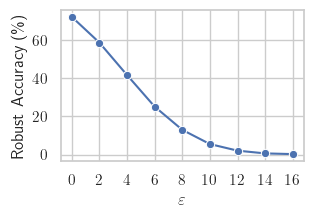

In [5]:
sns.lineplot(data=df, x="eps", y="robust_accuracy", marker="o")
plt.xlabel("$\\varepsilon$")
plt.ylabel("Robust Accuracy (\%)")
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16]);
plt.savefig(OUTPUT_IMAGES_LOCATION / "aa_sanity_check.pdf", bbox_inches="tight")

In [6]:
sns.set(rc={"figure.figsize": (3.14, 3.14 / 1.6),
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 10,
            "legend.title_fontsize": 10},
        style="whitegrid",
        font_scale=1)

In [7]:
xcit_epochs_df = pd.read_csv("data/robust_acc_xcits.csv")
xcit_epochs_df = xcit_epochs_df[["epoch", "xcit_small_12_p16_224", "xcit_medium_12_p16_224", "xcit_large_12_p16_224"]]
xcit_epochs_df = xcit_epochs_df \
    .rename(columns={
        "xcit_small_12_p16_224": "XCiT-S12",
        "xcit_medium_12_p16_224": "XCiT-M12",
        "xcit_large_12_p16_224": "XCiT-L12",
        "epoch": "Epoch"}) \
    .melt(value_vars=["XCiT-S12", "XCiT-M12", "XCiT-L12"], id_vars=["Epoch"], value_name="Val robust accuracy (\%)", var_name="Model")
xcit_epochs_df["phase"] = "Val"
xcit_epochs_df.head()

,Epoch,Model,Val robust accuracy (\%),phase
0,0,XCiT-S12,0.000000,Val
1,1,XCiT-S12,2.503597,Val
2,2,XCiT-S12,7.083200,Val
3,3,XCiT-S12,12.482018,Val
4,4,XCiT-S12,16.959719,Val


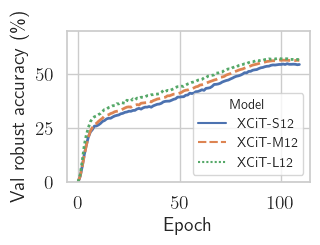

In [8]:
sns.lineplot(data=xcit_epochs_df, x="Epoch", y="Val robust accuracy (\%)", style="Model", hue="Model", linewidth=2)
plt.ylim([0, 70])
plt.savefig(OUTPUT_IMAGES_LOCATION / "learning-curves.pdf", bbox_inches="tight")

In [9]:
xcit_epochs_df_train = pd.read_csv("data/robust_acc_xcits_train.csv")
xcit_epochs_df_train = xcit_epochs_df_train[["epoch", "xcit_small_12_p16_224", "xcit_medium_12_p16_224", "xcit_large_12_p16_224"]]
xcit_epochs_df_train = xcit_epochs_df_train \
    .rename(columns={
        "xcit_small_12_p16_224": "XCiT-S12",
        "xcit_medium_12_p16_224": "XCiT-M12",
        "xcit_large_12_p16_224": "XCiT-L12",
        "epoch": "Epoch"}) \
    .melt(value_vars=["XCiT-S12", "XCiT-M12", "XCiT-L12"], id_vars=["Epoch"], value_name="Train robust accuracy (\%)", var_name="Model")
xcit_epochs_df_train["phase"] = "Train"
xcit_epochs_df_train.head()

,Epoch,Model,Train robust accuracy (\%),phase
0,0,XCiT-S12,0.219649,Train
1,1,XCiT-S12,3.619911,Train
2,2,XCiT-S12,11.240921,Train
3,3,XCiT-S12,16.979551,Train
4,4,XCiT-S12,20.497906,Train


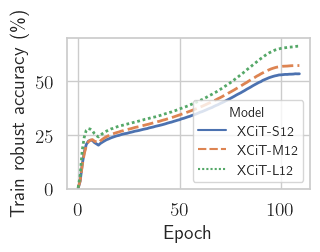

In [10]:
sns.lineplot(data=xcit_epochs_df_train, x="Epoch", y="Train robust accuracy (\%)", style="Model", hue="Model", linewidth=2)
plt.ylim([0, 70])
plt.savefig(OUTPUT_IMAGES_LOCATION / "learning-curves-train.pdf", bbox_inches="tight")